----

- 분류의 성능 평가 지표에 대해 알아보자(특히나 이진 분류에서 중요)
  - 정확도
  - 오차행렬
  - 정밀도
  - 재현율
  - F1 스코어
  - ROC AUC

- 분류
  - 결정 클래스가 2개 : 이진 분류
  - 결정 클래스가 여러 개 : 멀티 분류

In [35]:
import numpy as np
from sklearn.base import BaseEstimator


# BaseEstimator 클래스를 상속받아, 아무런 학습 X, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성
# 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자가 생성할 수 있다.
class MyDummyClassifier(BaseEstimator): # 상속 받는 中
   
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

- 즉, 학습은 하지 않고 예측만 하는 알고리즘의 모델을 자체 생성한 것

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df) # 데이터 전처리하는 함수
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier() # 객체 생성
myclf.fit(X_train ,y_train) # 학습 수행, 어차피 해당 객체에선 아무것도 학습하지 않을 것임
mypredictions = myclf.predict(X_test) # 예측 수행
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions))) # 평가 수행

Dummy Classifier의 정확도는: 0.7877


- 정확도 평가지표의 맹점 : 데이터 분포도가 균일하지 않는 경우 높은 수치가 나타날 수 있음
  - 150p 참고

In [48]:
np.ones( (5, 1) , dtype=bool)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [50]:
np.zeros( (5, 1) , dtype=bool)

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [64]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator # Customized 형태의 Estimator를 생성할 수 있다. 
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator): # BaseEstimator 클래스로부터 상속받는 중
    def fit(self,X,y):
        pass # 학습은 하지 않는다.
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값, False로 만들어서 반환
    # 모든 예측을 다 0으로 하고 있음
    # 아래에서 볼 수 있겠지만
    # label의 분포가 0은 405개 1은 45개임, 즉 7은 45개만 있음
    # 따라서 다 7이 아니라고 예측하는 알고리즘인
    # 다음과 같이 모두 예측을 0으로 해버리는 알고리즘을 생성해도
    # 450개중 405개를 맞출 수 있게 된다.
    # 약 90%의 정확도를 보일 것.
    # 즉 결론은 데이터의 분포가 균일하지 않은 경우 정확도라는 평가지표는
    # 높은 수치를 낼 수 있음
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)
    # dtype을 꼭 bool형태로 하지 않아도 될 것 같다. 
    # False로만 이루어진 열벡터를 생성한다.
    
# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


----

---

In [65]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [66]:
(digits.target == 7).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [68]:
pd.Series(y_test)

0      0
1      0
2      0
3      0
4      0
      ..
445    0
446    0
447    0
448    0
449    0
Length: 450, dtype: int32

In [69]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


In [73]:
fakepred.sum()

0

- 즉, 모두다 예측을 0으로 한 것을 알 수 있다. 

- 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안 된다. 
  - 극복 : 오차행렬에 대해 알아보자

---

- 오차 행렬
  - 이진 분류에서 성능지표로 활용되는 오차행렬은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표
  - 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
  - TN : True Negative 
  - FN : Fasle Negative
  - FP : False Positive
  - TP : True Positive
  - 앞문자는 예측값과 실제값이 같은가 틀린가
  - 뒤문자는 예측값

In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

- 왼쪽, 오른쪽 = 예측클래스로서 N,P
- 위, 아래 = 실제클래스로서 N,P

- 즉, (TN,FN) = (405,45)임을 알 수 있다.

- 이 값들을 조합해 Classifier의 성능 측정 지표를 알 수 있다.
  - 정확도 : 예측값과 실제값이 얼마나 동일한가
    - (TN + TP) / (TN + FP + FN + TP)
    - 불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측정확도가 높아지는 경향이 발생한다.
    - 정확도는 불균형한 이진 분류 데이터 세트에서 부적합할  수 있다는 것이다.
    - 정밀도나 재현율을 활용하는 게 더 좋다.
    - 정밀도나 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가지표이다.
  - 정밀도 (양성 예측 중 실제도 양성인 경우)
    - TP / (FP + TP) 
    - Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불린다.
  - 재현율 (실제 양성 중 예측도 양성인 경우)
    - TP / (FN + TP)
    - 민감도 또는 TPR(True Positive Rate)이라고 불린다.
    - 암 판단 모델, 보험 사기와 같은 금융 사기 적발 모델과 같은 분야에서 중요할 것

- 보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 多
  - 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우
  - 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    - 스팸메일 필터링 할 때, 실제론 업무 메일이지만 스팸으로 판단하는 경우

- 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN를 낮추는 데, 정밀도는 FP를 낮추는 데 초점을 맞춘다.
  - 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용된다.
  - 가장 좋은 성능 평가는 둘 다 높은 수치를 얻는 것

```python
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
# (순서대로) 정확도, 정밀도, 재현율, 오차 행렬 불러옴

# 평가를 한 번에 호출하는 함수
def get_clf_eval(y_test , pred): # get classification evaluation
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))
# 로지스틱 회귀 기반 예측 수행 후, 평가해보자
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived'] # 정답 레이블 추출
X_titanic_df= titanic_df.drop('Survived', axis=1) # feature 레이블 추출
# train_test_split 함수 사용위해서 정답레이블과 feature 레이블을 분리해서 넣어주어야 한다.그래서 분리해서 따로 저장해두었던 것

X_titanic_df = transform_features(X_titanic_df) # 앞에서 만들었던 데이터 전처리 한 번에 수행하는 함수

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train) # 학습 수행 中
pred = lr_clf.predict(X_test) # 예측 수행 中
get_clf_eval(y_test , pred) # 평가해보자
```

- 정밀도에 비해 재현율이 낮게 나왔다.
  - 다시 review
  - 정밀도 : 양성 예측 중 실제도 양성
  - `재`현율 : 실`제` 양성 중 예측도 양성

---

- 정밀도/재현율 트레이드오프
  - 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.
    - 사이킷런의 분류 알고리즘 : 일반적으로 이진 분류에서는 결정 임계값을 0.5로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정.
  - 그러나 이 둘은 상호보완적인 지표, 시소의 관계에 있다. 이를 정밀도/재현율의 트레이드오프라고 부른다.

- 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()
- 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능.
  - ```python
  lr_clf.predict_proba(X_test)
  ```
- predict() 메서드와 유사하지만 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과이다.
  - 첫 번째 칼럼이 클래스 값 0에 대한 예측 확률, 두 번째 칼럼이 클래스 값 1에 대한 예측 확률.

- predict_proba() 메서드와 predict() 메서드의 결과를 비교해보자

```python
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])




# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])



pred_proba_result에서, pred_proba는 2개의 칼럼으로 이루어져있음을 pred_proba.shape으로 확인했음
그 옆에 한 개의 칼럼으로 이진 분류 결과값 붙여주기 위해서 reshape함수 사용했음
reshape(-1,1) = 행은 상관하지 말고 1열로
reshape(-1,3) = 행은 상관하지 말고 3열로
reshape(1,-1) = 열은 상관하지 말고 1행으로
reshape(4,-1) = 열은 상관하지 말고 4행으로

np.concatenate => R에서의 rbind, cbind 느낌

```

- 사실 predict() 메서드는 predict_proba() 메서드에 기반해 생성된 API이다.
- 사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정할 수 있다.

In [32]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]


# threshold 기준값 이하이면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


- 이제 이 Binarizer를 이용해 사이킷런의 predict()의 의사(pseudo) 코드를 만들어보자

```python
#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼(두개의 컬럼 중 하나는 Negative, 두 번째는 Positive칼럼)
# 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 행은 상관하지 않고 1열로 추출

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)
```

- pred : 0.5기준으로 0과 1로 나눴음
- pred_proba -> 예측 확률을 반환함
  - 그러나 Binarizer를 이용하여 pred와 똑같은 결과를 반환하였음

- 앞의 결과와 일맥상통
  - 즉, pred와 pred_proba가 동일 과정을 거침을 알 수 있다. 
    - 둘다 threshold가 0.5임을 알 수 있다. 
  - 이제 진짜 threshold를 조정해보자

```python
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)
```

- 임계값 하향 조정
  - 재현율 상승, 정밀도 하락
    - 재현율이 상승했다.
      - 재현율 : 실제 양성 중 양성을 예측하는 확률
      - 즉 TP / FN + TP에서 FN이 낮아진 것을 의미함.
    - threshold = Positive 예측값을 결정하는 확률의 기준.
    - threshold 하향조정함으로써 Positive 결정이 너그러워졌음
    - True 값이 많아졌다.
    - Positive 예측값이 많아지면 상대적으로 재현율 값 상승
    - 양성 예측을 많이 하다 보니 실제 양성을 음성(FN)으로 예측하는 횟수가 상대적으로 줄어듦

- 임계값은 0.4에서 0.5, 0.6 증가시키며 평가지표 확인

---

```python
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1) # 여기서 임계값을 기준으로 N 혹은 P로 나눌 것임.
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )
# 해당 함수에 pred_proba_c1 자리에 양성예측 확률을 넣어줬음
```

- threshold가 0.45일 경우에 default 값이었던 0.5인 경우와 비교해서, 정확도 동일, 정밀도 약간 하락, 재현율 상승
  - 재현율을 상승시키면서 다른 수치의 손해를 어느 정도 감안한다면 threshold = 0.45가 적당해 보인다.

----

- 이와 유사한 기능인 precision_recall_curve() API가 있다.
  - threshold별 정밀도와 재현율 알 수 있다.

- `precision_recall_curve()는 일반적으로 0.11~0.95 정도의 threshold를 담은 ndarray와 이 임계값에 해당하는 정밀도 및 재현율 값을 담은 ndarray를 반환한다` 
  ```python
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
  ```

```python
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
# 인자로 테스트 데이터 셋인 X_test를 넣어줬음
# 학습된 모델에서 테스트 데이터 셋 넣어줬으니 예측할 것임.

# 실제값 데이터 셋(y_test)과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))ㅡ
```

- threshold 값이 증가할수록 정밀도 값은 동시에 높아지나. 재현율 값은 낮아진다.
  - 임계값이 증가한다 $\to$ 양성으로 판단할 경우가 낮아짐 $\to$ 정밀도(양성 예측에 해당되는 분모가 낮아짐)가 높아짐
- 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화 할 수 있다. (166p 참고)

-----

> 결론

    Positive 예측의 임계값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다. 
    임계값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 한다.
    물론 분류가 정밀도 또는 재현율 중 하나에 상대적인 중요도를 부여해 각 예측 상황에 맞는 분류 알고리즘을 튜닝할 수 있지만, 그렇다고 정밀도/재현율 중 하나만 강조하는 상황이 돼서는 안 된다. (예를 들어, 암 예측 모델에서 재현율을 높인다고 걸핏하면 양성으로 판단하는 건 지양해야 하듯 말이다.)

---

- F1 스코어
  - 정밀도와 재현율을 결합한 지표
  - 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.
  - $2 * \frac{precision * recall}{precision + recall}$

```python
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))
```

- 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표(정확도, 정밀도, 재현율, F1 스코어)를 구해보자

```python
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred) # 오차 행렬
    accuracy = accuracy_score(y_test , pred) # 정확도
    precision = precision_score(y_test , pred) # 정밀도
    recall = recall_score(y_test , pred) # 재현율
    f1 = f1_score(y_test,pred) # F1 스코어 추가
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test) # 이게 predict ,예측 역할을 하는 것.
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)
```

- get_eval_by_threshold 메서드 안에 get_clf_eval 메서드가 들어있음

- F1 스코어는 임곗값이 0.6일 때, 가장 좋은 값을 보여준다. 
  - 하지만 임곗값이 0.6인 경우에는 재현율이 크게 감소하고 있으니 주지해야 한다.

---

- ROC 곡선과 AUC(Area Under Curve : 곡선하면적)
  - ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다.
  - ROC 곡선은 FPR(False Positive Rate) = 1 - TNR 또는 1 - 특이성이 변할 때, TPR(True Positive Rate) = 재현율, 민감도가 어떻게 변하는지를 나타내는 곡선이다.

- 민감도(TPR)는 실제값 Positive가 정확히 예측돼야 하는 수준을 나타낸다. (질병이 있는 사람을 질병이 있는 것으로 양성 판정)
- 특이성(TNR)은 실제값 Negative가 정확히 예측돼야 하는 수준을 나타낸다. (질병이 없는 사람을 질병이 없는 것으로 음성 판정)
  - 민감도에 대응하는 지표가 특이성이다.

- 사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공.
  - precision_recall_curve() API와 유사.

- ROC 곡선을 이용해 타이타닉 생존자 예측 모델의 FPR, TPR, 임계값을 구해 보자.

```python
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환 결과 
# fprs = fpr 값을 array로 반환
# tprs = tpr 값을 array로 반환
# threshold = threshold 값 array

# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))
```

- 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커진다.
  - 임계값이 점점 작아진다 -> Positive 확률이 높아진다 -> FPR이 점점 커진다
  - 그리고 FPR이 조금씩 커질 때, TPR은 가파르게 커짐을 알 수 있다.

- ROC 곡선은 원점을 지나는 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것이다.

- 일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다.
- AUC 값은 일반적으로 1에 가까울수록 좋은 수치이다.
- AUC가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건이다.

```python
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))
```

- 타이타닉 생존자 예측 로지스틱 회귀 모델의 ROC AUC 값은 0.9024로 추정됐다.

```python
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba) ##### ROC-AUC 추가 #####
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
```

- ROC AUC는 예측 확률값을 기반으로 계산되므로 이를 get_clf_eval() 함수의 인자로 받을 수 있도록 
```python
def get_clf_eval(y_test, pred=None, pred_proba=None):
```
- 로 함수형을 변경해준다.
- ROC AUC이전에 get_clf_eval은 pred -> 즉 prediction -> 즉 확률값이 아닌, 확률값에 기반해서 임계값을 넘으면 1로 예측한 결과값을 넣어줬음
- 따라서 위 함수의 pred값들은 전부 0,1로 이루어진 배열이었음
  - pred_proba를 이용할 땐, Binarizer를 이용해서 1로 예측하는 확률을 임의의 임계값을 기준으로 전부 이진분류해주고 pred로 넣어줬음
  - 그런데 ROC AUC는 이진분류된 0,1들을 인자로 받지 않고 그냥 예측 확률 자체를 인자로 받겠다는 말임
  - 즉 confusion부터 F1까지만 이용하려면 pred 인자 자리에 값을 넣어주면 되고 여기에 ROC AUC까지 이용하려면 pred_proba인자에 값을 넣어주면 됨
  - 안 넣으면 그 평가지표는 출력이 안 되는 것임
 

> ### 함수에서 인자의 값으로 None 입력 ?

    값을 따로 주지 않으면, 실행 자체가 안 된다.
    None을 줌으로써 사용안 할 땐 그냥 할당하지 않으면 되고, 사용할 땐 할당을 해주면 된다.

In [3]:
def f1(a,b=None):
    print(a)
    print(b)

In [4]:
f1(123)

123
None


In [6]:
f1(b=2)

TypeError: f1() missing 1 required positional argument: 'a'

- a는 None처리 안 해줬으므로 입력 안 해주면 error가 발생하는 것

In [15]:
f1(123,14)

123
14


---

---

---

---

# 피마 인디언 당뇨병 예측
  - 당뇨병 여부 판단하는 머신러닝 예측 모델 수립, 평가 지표 적용

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


- Outcome이 종속변수 역할

---

> 잡담

In [8]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
type(diabetes_data['Outcome'].value_counts())

pandas.core.series.Series

In [11]:
a = diabetes_data['Outcome'].value_counts()

In [12]:
a.index

Int64Index([0, 1], dtype='int64')

In [13]:
a.values

array([500, 268], dtype=int64)

<AxesSubplot:>

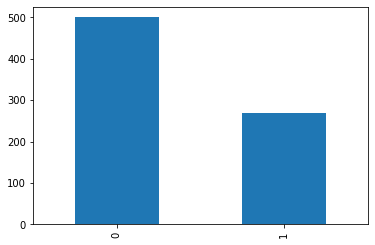

In [14]:
a.plot.bar()

> 잡담 끝

---

- feature 타입과 Null 개수 확인
  - pd.DataFrame에서 info()로 접근
 

In [16]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- feature의 type은 모두 숫자형임
- 임신 횟수, 나이와 같은 숫자형 faeture와 당뇨 검사 수치 feature로 구성된 특징으로 볼 떄 별도의 feautre encoding은 필요하지 않음
  - 문자열 값이 아니기에 label encoding이나 One-Hot encoding도 불필요
  - feature scaling은 별도의 문제임
    - 값의 범위같은 것들을 다루는 것이기 때문에 Dtype과는 아직 별개임

- 로지스틱 회귀를 이용해 예측 모델을 생성해보자

```python 
X = diabetes_data.iloc[:, :-1] # 피처 데이터 세트 X
y = diabetes_data.iloc[:, -1] # 레이블 데이터 세트 y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# stratify: default는 None 
# classification을 다룰 때 매우 중요한 옵션값
# stratify 값을 target으로 지정해주면 각각의 class 비율을 train / test에 유지해 줌. 
# 한 쪽에 쏠려서 분배되는 것을 방지 
# 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있음

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
# solver = https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions
# 간단히말하면 최적화에 사용할 알고리즘을 결정하는 것
# newton-cg, lbfgs, liblinear, sag, saga등을 선택할 수 있음
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test) # 예측 label을 반환, 반환 값은 pred에 저장
pred_proba = lr_clf.predict_proba(X_test)[:, 1] # 각 label의 확률값을 반환, 반환값을 pred_proba에 저장

get_clf_eval(y_test , pred, pred_proba)
```

In [17]:
diabetes_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
(500/768)*100

65.10416666666666

- 예측 정확도가 77.27%, 재현율은 59.26%로 측정.
- 전체 데이터의 500개가 Negative임
  - 65%가 Negative
    - 즉 정확도보다는 재현율 성능에 초점 맞춰야함
    - 재현율 : 실제 양성을 양성이라고 예측할 확률
      - TP / TP + FN
      - 즉 data set의 분포 자체가 Negative가 많아 양성으로 예측할 확률이 $\downarrow$

- 이를 위해 정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화를 확인해보자
- 재현율 곡선을 보면 임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞출 것 같다.
- 하지만 두 개의 지표 모두 0.7이 안 되는 수치로 보인다.
- 여전히 두 지표의 값이 낮다.
- 임곗값을 인위적으로 조작하기 전에 다시 데이터 값을 점검해보자

In [20]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- min값이 0으로 돼 있는 feature가 상당히 많다.
  - 이를테면, Glucose feature는 포도당 수치인데 min값이 0인 것은 맞지 않음

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

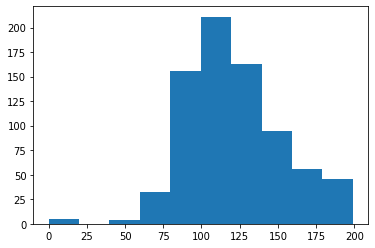

In [21]:
plt.hist(diabetes_data['Glucose'],bins=10)

- 히스토그램에서 0값이 일부 확인됨을 알 수 있다. 
- min() 값이 0으로 돼 있는 feature에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인해 보자.

In [23]:
diabetes_data[diabetes_data['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [24]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    # diabetes_data[diabetes_data[feature] == 0] 0인 값에 해당하는 행만 뽑는 것.
    # 이어서 [feature] 입력해주면, 그 열만 얻을 수 있고
    # pd.DataFrame의 내장 함수 기능인 count()기능을 이용하는 것
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


- SkinThickness와 Insulin의 0값 비율은 대단히 높다. 
- 전체 데이터의 건수가 많지 않기 때문에 이들 데이터를 일괄적으로 삭제할 경우 학습에 악영향
- 위 feature의 0값을 평균으로 대체한다.

In [25]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())
# 해당 df에서 zero_features에 해당되는 열들만 다 뽑고, replace 메서드를 이용하여 0 값은 모두 평균으로 대체

- 0값을 평균값으로 대체한 데이터 세트에 feature scaling 적용해 변환
- 로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋다 
- 이후에 다시 학습/테스트 데이터 세트로 나누고 로지스틱 회귀를 적용해 성능 평가 지표를 확인한다. 

```python
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y
# y는 이진분류이기 때문에 feature scaling 필요 없음                                     
# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
# solver는 최적화 알고리즘 선택한 것임
# 그 외에도 수 개의 선택지가 있음
                                                    
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test) # 이진 분류로 예측
pred_proba = lr_clf.predict_proba(X_test)[:, 1] # 각 label의 확률값을 반환
 
get_clf_eval(y_test , pred, pred_proba)
```

- 데이터 변환과 scaling을 통해 성능 수치가 일정 수준 개선됐다.
- 여전히 재현율 수치는 개선이 필요해보인다. 
- 분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느 정도나 개선되는지 확인해보자

```python
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        # 이진분류 해줌
        # pred_proba_c1는 2차원의 1열 배열이여야함 
        # 그래서 아래에서 reshape을 이용해서 변환해주었음
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )
```

- 임곗값을 0.48로 낮춘 상태에서 다시 예측을 해보자
  - 사이킷런의 predict() 메서드는 임곗값을 마음대로 변환할 수 없으므로 별도의 로직으로 이를 구현해야 한다.
  - 아래와 같다

```python
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])
```

---

---

---

> 정리

    이진 분류의 레이블 값이 불균형하게 분포될 경우(즉, 0이 매우 많고, 1이 매우 적을 경우 또는 반대의 경우)단순히 예측 결과와 실제 결과가 일치하는 지표인 정확도만으로는 머신러닝 모델의 예측 성능을 평가할 수 없다. 
    
    
    정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다.
    
    
    특히 재현율(실제 양성 중 양성으로 예측할 확률)이 상대적으로 더 중요한 지표인 경우는 암 양성 예측 모델과 같이 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다. 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값을 조정해 정밀도 도는 재현율의 수치를 높이는 방법도 있다.
    
    F1 스코어는 정밀도와 재현율을 결합한 평가 지표이며, 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 지표값을 가지게 된다.
    
    ROC-AUC는 일반적으로 이진 분류의 성능 평가를 위해 가장 많이 사용되는 지표이다. 일반적으로 1에 가까울수록 좋은 수치이다.

---

---

---

- 정리할 것
  - astype같은 것들
  - tolist
  - class